## Practice Final Exam Questions

### Warm-up Questions

1.)

Print the number of elements in the RDD B

Print the first five elements of RDD B

In [1]:
n=10000;
B=sc.parallelize(range(n))

## Your answer here
print B.count()
print B.top(5)

10000
[9999, 9998, 9997, 9996, 9995]


2.) 

Given an RDD of words, find and output one of the longest words

In [2]:
words=['this','is','the','best','mac','ever','jupyter']
wordRDD=sc.parallelize(words)

## Your answer here
wordRDD.map(lambda x: (len(x), x)).sortByKey().top(1)[0][1]

'jupyter'

3.)

Remove duplicate elements in RDD

In [3]:
DuplicateRDD = sc.parallelize([1,1,2,2,3,3])

## Your answer here
DuplicateRDD.distinct().collect()

[2, 1, 3]

4.)

Given an RDD, create a new RDD where each element appears twice

In [4]:
A=sc.parallelize(range(5))

A.flatMap(lambda x:(x,x)).collect()

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4]

5.)

Count how many positive numbers are there in the RDD?

In [5]:
B=sc.parallelize(range(-10,20))

## Your answer here
B.filter(lambda x: x>0).count()

19

### Pair RDD Questions

6.)

Compute and print the largest value for each key in this pair RDD

In [6]:
PairRDD = sc.parallelize([(1,2), (2,4), (2,6)])

## Your answer here
PairRDD.map(lambda x: max(x)).collect()

[2, 4, 6]

7.)

Sort a pair RDD by key and print the result

In [7]:
PairRDD = sc.parallelize([(2,2),(1,4),(3,6),(2,1)])

## Your answer here
PairRDD.sortByKey().collect()

[(1, 4), (2, 2), (2, 1), (3, 6)]

8.)

Perform the following transformation:

Original RDD : `[(1, 2), (2, 4), (2, 6)]`

After transformation :  `[(2, [4, 6]), (1, [2])]`

In [8]:
## Your answer here
A = sc.parallelize([(1, 2), (2, 4), (2, 6)])
# A.reduceByKey(lambda x,y: [x,y]).collect()
A.groupByKey().mapValues(list).collect()

[(2, [4, 6]), (1, [2])]

9.)

Given two pair RDDs A and B, create the following RDD

`[('adam', ('kalai', None)),
 ('vaclav', (None, 'M')),
 ('john', ('dow', 'M')),
 ('beth', ('simon', 'F'))]`

In [9]:
A=sc.parallelize([('john','dow'),('adam','kalai'),('beth','simon')])
B=sc.parallelize([('beth','F'),('john','M'),('vaclav','M')])

## Your answer here
A.fullOuterJoin(B).collect()

[('adam', ('kalai', None)),
 ('vaclav', (None, 'M')),
 ('john', ('dow', 'M')),
 ('beth', ('simon', 'F'))]

### Statistics Questions

10.)

Suppose X is an RDD where each element is a floating point value. Write code to **efficiently** compute a good **approximation** of the median value?

In [10]:
import numpy as np
from numpy.random import rand
X=sc.parallelize(rand(10000000)/2)

## Your answer here
print 'median:',X.sample(False, 0.0001).sortBy(lambda x:x).collect()[500]

median: 0.244430159183


11.)

For the same RDD in Q-10, compute the mean and the standard deviation.

In [11]:
## Your answer here
N,S = X.map(lambda x: (1,x)).reduce(lambda a,b: (a[0]+b[0],a[1]+b[1]))
print 'mean:', S/N 

mean: 0.250052013825


In [12]:
s2,s,n = X.map(lambda x: (x*x, x, 1)).reduce(lambda x,y: (x[0]+y[0],x[1]+y[1],x[2]+y[2]))
print 'st. dev.:', (s2/n) - (s/n)**2

st. dev.: 0.0208462969653


12.) 

Suppose R is an RDD of tuples, each tuple containing two floating point numbers $(x,y)$. Compute the covariance of $x$ and $y$ using a single pass over the RDD.

In [19]:
n=10000
a=rand(n); b=rand(n)
R=sc.parallelize(zip(5*a+b,5*a-b))

## Your answer here
x, y, xy, n = R.map(lambda (a,b): (a,b,a*b,1)).reduce(lambda a,b:(a[0]+b[0],a[1]+b[1],a[2]+b[2],a[3]+b[3]))
print 'cov:', (xy/n)-((x/n)*(y/n))

cov: 1.96890583191


13.)

Suppose R is an RDD that contains integer numbers in the range 0 to 3. Write code to efficiently compute and plot an approximate histogram.

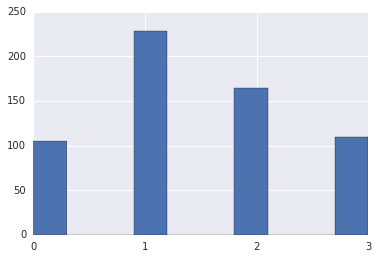

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

X=([0]*10000+[1]*23000+[2]*15532+[3]*10000)
keys=rand(len(X))
R=sc.parallelize(zip(keys,X)).cache()
R=R.repartitionAndSortWithinPartitions(2).map(lambda x:x[1])

## Your answer here
data = R.sample(False, 0.01).collect()
plt.xticks(range(4))
plt.hist(data);